In [ ]:
import torch 
import torchvision
import torchvision.datasets as datasets
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor
from torch import optim 
from torch.autograd import Variable
import matplotlib.pyplot as plt

In [ ]:
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=ToTensor())
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=ToTensor())

While training a model, we typically want to pass samples in “minibatches” (batch_size = 100), reshuffle the data at every epoch to reduce model overfitting (shuffle = True), and use Python’s multiprocessing to speed up data retrieval.

DataLoader is an iterable that abstracts this complexity for us in an easy API.

At the heart of PyTorch data loading utility is the **torch.utils.data.DataLoader** class. It represents **a Python iterable over a dataset**

The snippet below has visualisation purposes (to get a good grasp of how our data actually looks like)



Feature batch shape: torch.Size([100, 1, 28, 28])
Labels batch shape: torch.Size([100])


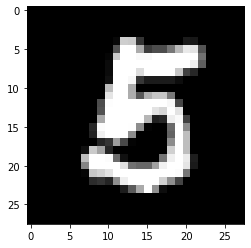

Label: 5
tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,

In [ ]:
Data_train = torch.utils.data.DataLoader(mnist_trainset, 
                                          batch_size=100, 
                                          shuffle=True,
                                          num_workers=1)
# We have loaded our MNIST dataset into the Dataloader object and can iterate through the dataset as needed
print(Data_train)

train_features, train_labels = next(iter(Data_train))
#iter() calls the __iter__() method on the Data_train which returns an iterator
#next() then calls the __next__() method on that iterator to get the first iteration. Running next() again will get the second item of the iterator, etc
print(f'Feature batch shape: {train_features.size()}')
print(f'Labels batch shape: {train_labels.size()}')
img = train_features[0].squeeze()
#torch.squeeze(input, dim=None, *, out=None) -> Returns a tensor with all the dimensions of input of size 1 removed.
# For example, if input is of shape:(A×1×B×C×1×D) then the out tensor will be of shape: (A×B×C×D).
label = train_labels[0]
plt.imshow(img, cmap = 'gray')
plt.show()
print(f'Label: {label}')
print(train_features)
print(train_labels)

**Don't get confused!!**

Our dataset is divided in smaller compartments called *batches*.

The number of *epochs* is the number of times the whole dataset is passed forward and backward through the neural network at once. Since this would require big computational costs, we need to divide the data in batches of smaller sizes and feed our model with them one by one.


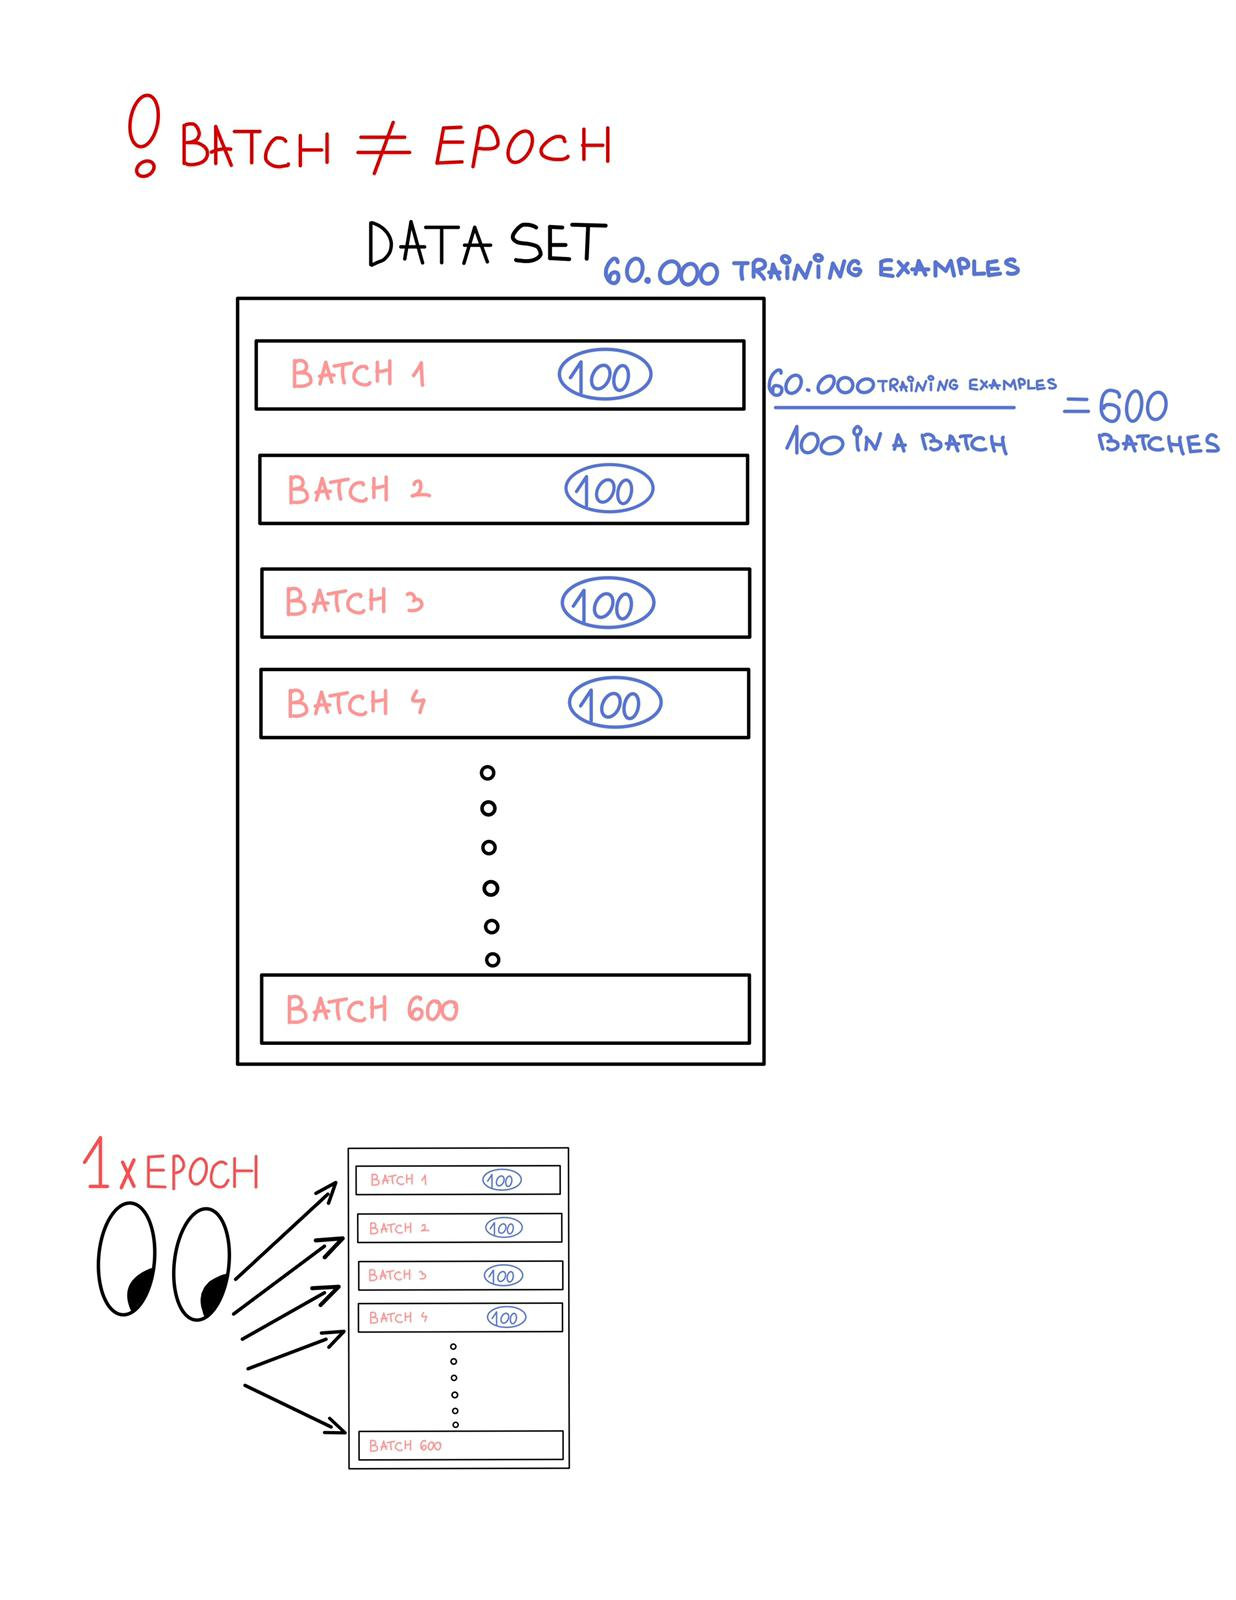

We'll use Cross-Entropy as our loss function. Cross-entropy builds upon the idea of entropy from information theory and calculates the number of bits required to represent or transmit an average event from one distribution compared to another distribution.

Adam is a replacement optimization algorithm for stochastic gradient descent for training deep learning models.


 For further details see 
1.   https://machinelearningmastery.com/cross-entropy-for-machine-learning/

2.   https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/



In [ ]:
# Every batch contains 100 images, as we set at the beggining, by giving the value 100 to the constructor argument 'mini_batch' .
for i, (image, labels) in enumerate(Data_train):
  print(f"Batch's number {i} ---> Images from the batch: {image} ---> Labels:  {labels}")

Batch's number 0 ---> Images from the batch: tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
 

Batch's number 23 ---> Images from the batch: tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],


Batch's number 46 ---> Images from the batch: tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],


Batch's number 69 ---> Images from the batch: tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],


Batch's number 93 ---> Images from the batch: tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],


Batch's number 118 ---> Images from the batch: tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],

Batch's number 142 ---> Images from the batch: tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],

Batch's number 167 ---> Images from the batch: tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],

Batch's number 193 ---> Images from the batch: tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],

Batch's number 217 ---> Images from the batch: tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],

Batch's number 241 ---> Images from the batch: tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],

Batch's number 265 ---> Images from the batch: tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],

Batch's number 290 ---> Images from the batch: tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],

Batch's number 314 ---> Images from the batch: tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],

Batch's number 338 ---> Images from the batch: tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],

Batch's number 364 ---> Images from the batch: tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],

Batch's number 388 ---> Images from the batch: tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],

Batch's number 412 ---> Images from the batch: tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],

Batch's number 437 ---> Images from the batch: tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],

Batch's number 462 ---> Images from the batch: tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],

Batch's number 487 ---> Images from the batch: tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],

Batch's number 512 ---> Images from the batch: tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],

Batch's number 537 ---> Images from the batch: tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],

Batch's number 562 ---> Images from the batch: tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],

Batch's number 586 ---> Images from the batch: tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],

In [ ]:
# The iter() function (which in turn calls the __iter__() method) returns an iterator from them. Iterator in Python is simply an object that can be iterated upon
# We use the next() function to manually iterate through all the items of an iterator.
# When we reach the end and there is no more data to be returned, it will raise the StopIteration
# a Python iterator object must implement two special methods, __iter__() and __next__(), collectively called the iterator protocol.
it = iter(Data_train)
first = next(it) # this will output a list with 2 elements, corresponding to the first batch
second = next(it) # # this will output a list with 2 elements, corresponding to the second batch
print(type(first[0]))
print(type(first[1]))
print(type(first)) # first is a list containing 2 tensors
print(f'This is the tensorial representation of the images in the first batch: {first[0]}')
print(len(first[0]))
print(first[0].size())
print(f' Corresponding labels: {first[1]}')
print(len(first[1]))
print(first[1].size())

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'list'>
This is the tensorial representation of the images in the first batch: tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.]

Label of this image: 0


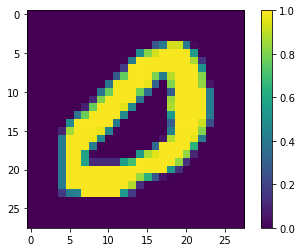

In [ ]:
print(f'Label of this image: {first[1][0].item()}')
#first[0][0] is the first image from the first batch
first[0][0].shape
first_ndarray = first[0][0].squeeze().numpy()
# numpy() function is the converter form torch.Tensor to numpy array.
plt.imshow(first_ndarray)
plt.colorbar()

### Model definition: 

We are going to use a simple CNN in order to make our predictions on the MNIST dataset


# <span style="color:red"> ADD REPRESENTATION OF THE SIMPLE CNN HERE </span>

This simple CNN will help us with model interpretation as it is easy to understand



In [ ]:
class CnnModel(nn.Module):
    def __init__(self):
        super(CnnModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 1, (5, 5), bias=True)
        self.flatt = nn.Flatten()
        self.dense1 = nn.Linear(576, 10)
        

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.flatt(x)
        x1 = self.dense1(x)
        return(F.softmax(x1, dim=1))
        

In [ ]:
# We now instantiate an object (net) of the CnnModel class, net being our architecture 
net = CnnModel()

In [ ]:
optimizer = optim.Adam(net.parameters(), lr = 0.01) 
loss_func = nn.CrossEntropyLoss()  
num_epochs = 10
total_step = len(Data_train) 
for epoch in range(num_epochs):
    for i, (images,labels) in enumerate(Data_train):
        b_x = Variable(images)   # images
        b_y = Variable(labels)   # labels
        output = net(b_x)
        loss = loss_func(output, b_y)
        optimizer.zero_grad()
        loss.backward() 
        optimizer.step()  
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' .format(epoch + 1, num_epochs, i + 1, total_step, loss.item()))


Epoch [1/10], Step [100/600], Loss: 1.5594
Epoch [1/10], Step [200/600], Loss: 1.5346
Epoch [1/10], Step [300/600], Loss: 1.5118
Epoch [1/10], Step [400/600], Loss: 1.5180
Epoch [1/10], Step [500/600], Loss: 1.5394
Epoch [1/10], Step [600/600], Loss: 1.5658
Epoch [2/10], Step [100/600], Loss: 1.5650
Epoch [2/10], Step [200/600], Loss: 1.5157
Epoch [2/10], Step [300/600], Loss: 1.5482
Epoch [2/10], Step [400/600], Loss: 1.5477
Epoch [2/10], Step [500/600], Loss: 1.5259
Epoch [2/10], Step [600/600], Loss: 1.5225
Epoch [3/10], Step [100/600], Loss: 1.5538
Epoch [3/10], Step [200/600], Loss: 1.5453
Epoch [3/10], Step [300/600], Loss: 1.5442
Epoch [3/10], Step [400/600], Loss: 1.5295
Epoch [3/10], Step [500/600], Loss: 1.5267
Epoch [3/10], Step [600/600], Loss: 1.5116
Epoch [4/10], Step [100/600], Loss: 1.5657
Epoch [4/10], Step [200/600], Loss: 1.5759
Epoch [4/10], Step [300/600], Loss: 1.5795
Epoch [4/10], Step [400/600], Loss: 1.5008
Epoch [4/10], Step [500/600], Loss: 1.5531
Epoch [4/10

In [ ]:
Data_test = torch.utils.data.DataLoader(mnist_testset, 
                                          batch_size=100, 
                                          shuffle=True,
                                          num_workers=1)

In [ ]:
# Let's begin our testing loop. 

net.eval()
test_loss = 0
correct = 0
test_losses = []
with torch.no_grad():
    for images, labels in Data_test:
        output = net(images)
        test_loss += loss_func(output, labels).item()
        pred = output.data.max(1, keepdim=True)[1]
        correct += pred.eq(labels.data.view_as(pred)).sum()
        test_loss /= len(Data_test.dataset)
        test_losses.append(test_loss)

print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(test_loss, correct, 
        len(Data_test.dataset),100. * correct / len(Data_test.dataset)))


Test set: Avg. loss: 0.0002, Accuracy: 9198/10000 (92%)



# Analysing the model by looking at the weights



# <span style="color:red"> ADDING PRESENTATION WITH IMAGES AND TEXT ABOUT RETAINING MODEL WEIGHTS AND THE WAY CONVOLUTION WORKS </span>


In [ ]:
# define the input
input1 = first[0][1].reshape(1, 1, 28, 28) # Change the second value to change the example

In [ ]:
conv = net.conv1.weight.reshape(5,5).detach().numpy() # Let's fetch the convolution filter learned by the model

Text(0.5, 1.0, '5x5 Convolution filter learned by the model')

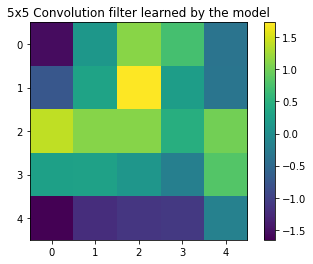

In [ ]:
plt.imshow(conv) # Let's plot 
plt.colorbar()
plt.title("5x5 Convolution filter learned by the model")

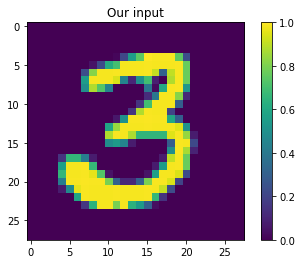

In [ ]:

#first[0][0] is the first image from the first batch
first[0][1].shape # Change the second value to change the example
first_ndarray = first[0][1].squeeze().numpy()
# numpy() function is the converter form torch.Tensor to numpy array.
plt.title("Our input")
plt.imshow(first_ndarray)
plt.colorbar()

In [ ]:
# Here we retrieve the output of the convolution layer from the input 
out_conv = net.conv1(input1).reshape(24,24).detach().numpy()

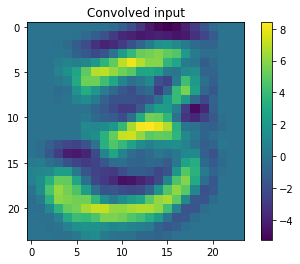

In [ ]:
plt.title("Convolved input")
plt.imshow(out_conv)
plt.colorbar()

## Questions to participants : 

What is the effect of convolution in your opinion ? How could that help ? 

(Answer -> improve contrast, more distinctions between borders = better prediction)

# <span style="color:red"> ADDING IMAGE SHOWING HOW THE WEIGHTS ARE DISTRIBUTED RELATING TO CLASS </span>

In [ ]:
# Here we retrieve the weights of the Dense layer (related to the right class)
right_class = first[1][1].item() # Change the second value to change the example
w = net.dense1.weight[right_class].reshape(24,24).detach().numpy()

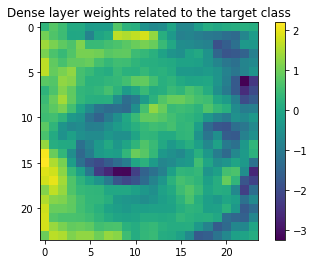

In [ ]:
plt.title("Dense layer weights related to the target class")
plt.imshow(w)
plt.colorbar()

## Question to participants : 

Do you see that the model is learning the right thing ? (i.e : does this look like the right class?)

(Answer -> depends on example, don't hesitate to let participants try other examples) 

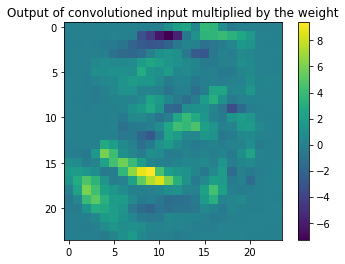

In [ ]:
plt.title("Output of convolutioned input multiplied by the weight")
plt.imshow((out_conv*w))
plt.colorbar()

# **Integrated Gradients** : simple, yet powerful explainability method

*What is it?*

Integrated Gradients is an axiomatic model interpretability algorithm that assigns an importance score to each input feature by approximating the integral of gradients of the model’s output with respect to the inputs along the path (straight line) from given baselines / references to inputs.

source: https://captum.ai/api/integrated_gradients.html


The integral of integrated gradients can be efficiently approximated via a summation. We simply sum the gradients at points occurring at
sufficiently small intervals along the straightline path from
the baseline x' to the input x.

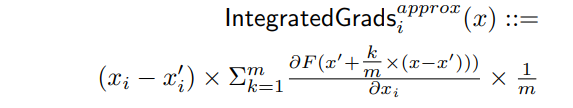

https://arxiv.org/pdf/1703.01365.pdf


*Why is Integrated Gradients superior to other interpretability techniques?*

-> it satisfies the two axioms **(Sensitivity and Implementation Invariance)**  that every attribution method must satisfy, but most known methods don't

-> it requires no modification to the original network

-> extraordinarily simple to implement

-> can be used to debug networks, extract rules from a network and enable the users of the network to engage beter with the model


For an easy-to-follow introduction to this topic, please read https://towardsdatascience.com/understanding-deep-learning-models-with-integrated-gradients-24ddce643dbf




Now, we'll prepare the right environment for implementing the Integrated Gradients method, using **Captum**, an open source, extensible library for model interpretability built on PyTorch. 

https://captum.ai/docs/introduction.html

### Let's implement it using the *Captum* library

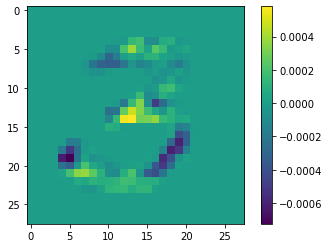

In [ ]:

input1.require_grad = True
baseline = torch.zeros(tuple(input1.size()))

# create an instance of my Integrated Gradients algorithm by passing the forward function of our model (net)
ig = IntegratedGradients(net)

# to compute the attributions we are calling the attribute method on the ig object that we have created above
# by passing the input and a target index we would like to attribute to
attributions = ig.attribute(input1, target = 8)
new_attributions = attributions.reshape(tuple(input1.squeeze().size()))
plt.imshow(new_attributions)
plt.colorbar()


# <span style="color:red"> ADD MORE INFORMATION ABOUT ATTRIBUTIONS </span>

## Question to participants : 

How do integrated gradients compare with looking at the weights ? What are the similarities ? The differences ? Can you explain them ? 

Answer -> integrated gradients looks at differences from a baseline, looks only at one example (doesn't generalize), takes into account bias (not only weights) which our weights analysis method doesn't do.

However I.G. generalizes to more complicated models, weights analysis doesn't. 

# Finding Similar Inputs
Neural network classifiers usually make mistakes on test data. 

<img src="https://drive.google.com/uc?export=download&id=1p5K8QTbYvfcTLvjNIXjna1H3SO1mum5s">

This method may help to explain why an input was misclassified. We will:
- Train a neural network on MNIST images
- Find a few misclassified test inputs
- Answer the question: which are the training examples most similar to the misclassifed input from the point of view of the network?

## Method
Inspired from [Caruana et al (1999)](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2232607/).

We will save the activations of one hidden layer for the whole training dataset. Note: in the original paper, they record *all layers*. We picked only one for simplicity and because intuitively a deep layer is more representative than a shallow one.

<img src="https://drive.google.com/uc?export=download&id=1BcnEpgFmQTKC3u7HNyZXe91V3-evflzE">

The activations will look like this:

|                  | Neuron 1 | Neuron 2 | Neuron 3 |   ...    | Neuron n |
| ---------------- | -------- | -------- | -------- | -------- | -------- |
| Training image 1 |    0.5   |   0.7    |   2.1    |   ...    |   -1.1   |
| Training image 2 |    -1.5  |   1.8    |   -3.2   |   ...    |   2.7    |
| Training image 3 |    0.2   |   -0.3   |   1.1    |   ...    |   3.5    |
|       ...        |    ...   |   ...    |   ...    |   ...    |   ...    |
| Training image T |   -1.2   |   1.5    |   0.1    |   ...    |   0.7    |
| Test image       |   0.8    |   0.3    |   0.9    |   ...    |   0.2    |

Then, we will compare the activations of the test image with those, and using k-nearest-neighbors, we'll return the closest images.

> ⚠️ This method relies on unverified assumptions: 
> 1. two inputs are similar from the network's point of view if they have similar activations; 
> 2. comparing activations with euclidean distance is a good idea.
> 
> The method can be used to get a hypothesis, but it will require further verification.

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Number of train images: 60000
Number of test images: 10000
Example training images:


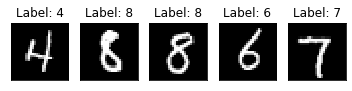

In [ ]:
#@title Download dataset
# https://nextjournal.com/gkoehler/pytorch-mnist
!pip install torch torchvision
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision

batch_size_train = 64
batch_size_test = 1000

random_seed = 1
torch.backends.cudnn.enabled = False
torch.manual_seed(random_seed)

# Download the dataset
train_dataset = torchvision.datasets.MNIST('/files/', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ]))
train_loader = torch.utils.data.DataLoader(
  train_dataset,
  batch_size=batch_size_train, shuffle=True)

test_dataset = torchvision.datasets.MNIST('/files/', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ]))
test_loader = torch.utils.data.DataLoader(
  test_dataset,
  batch_size=batch_size_test, shuffle=True)

print('Number of train images: {}'.format(len(train_dataset)))
print('Number of test images: {}'.format(len(test_dataset)))
print('Example training images:')

fig = plt.figure()
images, labels = next(iter(train_loader))
for i in range(5):
  plt.subplot(1,5,i+1)
  plt.imshow(images[i][0], cmap='gray', interpolation='none')
  plt.title("Label: {}".format(labels[i]))
  plt.xticks([])
  plt.yticks([])

In [ ]:
#@title Define the network
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 5, kernel_size=5)
        self.conv2 = nn.Conv2d(5, 2, kernel_size=5)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(800, 50)
        self.fc2 = nn.Linear(50, 10)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return self.softmax(x)

network = Net()

In [ ]:
#@title Train the network
n_epochs = 2
learning_rate = 0.01
momentum = 0.5
log_interval = 200

optimizer = torch.optim.SGD(network.parameters(), lr=learning_rate,
                      momentum=momentum)
train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]

loss_func = nn.CrossEntropyLoss()

def train(epoch):
  network.train()
  for batch_idx, (data, label) in enumerate(train_loader):
    optimizer.zero_grad()
    output = network(data)
    loss = loss_func(output, label)
    loss.backward()
    optimizer.step()
    if batch_idx % log_interval == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
        epoch, batch_idx * len(data), len(train_loader.dataset),
        100. * batch_idx / len(train_loader), loss.item()))
      train_losses.append(loss.item())
      train_counter.append(
        (batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))
      # torch.save(network.state_dict(), '/results/model.pth')
      # torch.save(optimizer.state_dict(), '/results/optimizer.pth')

def test():
  network.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, label in test_loader:
      output = network(data)
      test_loss += loss_func(output, label).item()
      pred = output.data.max(1, keepdim=True)[1]
      correct += pred.eq(label.data.view_as(pred)).sum()
  test_loss /= len(test_loader.dataset)
  test_losses.append(test_loss)
  print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))
  
test()
for epoch in range(1, n_epochs + 1):
  train(epoch)
  test()


Test set: Avg. loss: 0.0023, Accuracy: 1094/10000 (11%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.302211
Train Epoch: 1 [12800/60000 (21%)]	Loss: 2.302206
Train Epoch: 1 [25600/60000 (43%)]	Loss: 2.296480
Train Epoch: 1 [38400/60000 (64%)]	Loss: 1.761723
Train Epoch: 1 [51200/60000 (85%)]	Loss: 1.607051

Test set: Avg. loss: 0.0016, Accuracy: 8168/10000 (82%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 1.567890
Train Epoch: 2 [12800/60000 (21%)]	Loss: 1.639172
Train Epoch: 2 [25600/60000 (43%)]	Loss: 1.570138
Train Epoch: 2 [38400/60000 (64%)]	Loss: 1.704903
Train Epoch: 2 [51200/60000 (85%)]	Loss: 1.586292

Test set: Avg. loss: 0.0016, Accuracy: 8375/10000 (84%)



In [ ]:
# By default, when given inputs, the model returns only the outputs.
# To record activations in PyTorch, we can use a forward hook, which is a regular Python function. 
# When we attach the hook to a layer, every time that layer is used, our hook will be called.
activations = None # This global variable is used to read the activations after the computations
def hook_fc1(model, input, output):
  global activations
  activations = output.detach() # Only record output of the layer's
network.fc1.register_forward_hook(hook_fc1);

In [ ]:
# Record the activations of all training examples
# To avoid the complexity of batching, we load the full training dataset in 1 batch
full_training_dataset_loader = torch.utils.data.DataLoader(train_dataset, batch_size=len(train_dataset))
with torch.no_grad(): # disable gradients to make computations faster
  activations = None
  train_images, train_labels = next(iter(full_training_dataset_loader))
  # Predict for all training images
  train_predictions = network(train_images).data.max(dim=1)[1]
  # Save the activations in a separate variable
  train_activations = activations

  print(train_images.shape, train_labels.shape, train_predictions.shape, train_activations.shape)

torch.Size([60000, 1, 28, 28]) torch.Size([60000]) torch.Size([60000]) torch.Size([60000, 50])


In [ ]:
# Record the activations of all test examples
full_test_dataset_loader = torch.utils.data.DataLoader(test_dataset, batch_size=len(test_dataset))
with torch.no_grad():
  activations = None
  test_images, test_labels = next(iter(full_test_dataset_loader))
  test_predictions = network(test_images).data.max(dim=1)[1]
  test_activations = activations
  print(test_images.shape, test_labels.shape, test_predictions.shape, test_activations.shape)

torch.Size([10000, 1, 28, 28]) torch.Size([10000]) torch.Size([10000]) torch.Size([10000, 50])


In [ ]:
# Find the first 4 images that were misclassified
misclassification_indices = (test_predictions - test_labels).nonzero(as_tuple=True)[0].tolist()
test_indices = misclassification_indices[0:4]

## Finding the closest examples:
The computed activations (for training & test images) are lists of numbers. To find the similarity between two activations, we can use the Euclidean distance.

In 2-dimensions, the Euclidean distance between two points is $d = \sqrt{(x_1 - x_0)^2 + (y_1 - y_0)^2}$

Similarly, in n dimensions we can do the same $d = \sqrt{(x_1 - x_0)^2 + (y_1 - y_0)^2 + (z_1 - z_0)^2 + ...}$

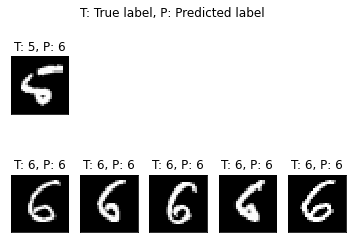

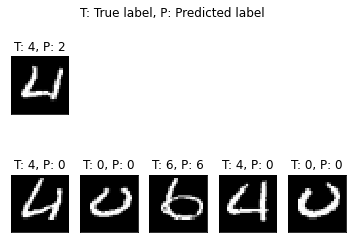

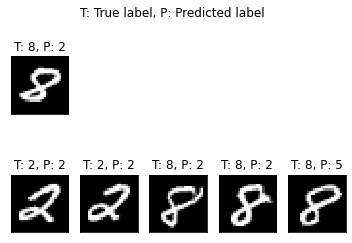

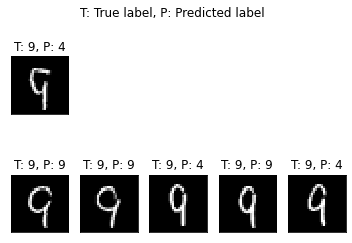

In [ ]:
# For the first 4 misclassifications:
for test_idx in test_indices:
  # Find the closest examples
  number_of_examples = 5
  differences = train_activations - test_activations[test_idx:test_idx+1] # Take all train activations and subtract the test image's activation
  distances = torch.norm(differences, dim=1, p=None) # Do the squared sum of all values 
  knn = distances.topk(number_of_examples, largest=False).indices # Get the indices of the smallest distances
  # print('Smallest distances indices: ', knn.tolist())
  # print('Smallest distances: ', distances.index_select(0, knn).tolist())

  # Draw the test image and the most similar training images
  fig = plt.figure()
  fig.suptitle("T: True label, P: Predicted label");
  plt.tight_layout()
  plt.subplot(2,number_of_examples,1)
  plt.imshow(test_images[test_idx][0], cmap='gray', interpolation='none')
  plt.title("T: {}, P: {}".format(test_labels[test_idx], test_predictions[test_idx]))
  plt.xticks([])
  plt.yticks([])
  for i in range(number_of_examples):
    plt.subplot(2,number_of_examples,i+1+number_of_examples)
    plt.imshow(train_images[knn[i]][0], cmap='gray', interpolation='none')
    plt.title("T: {}, P: {}".format(int(train_labels[knn[i]].item()), int(train_predictions[knn[i]].item())))
    plt.xticks([])
    plt.yticks([])

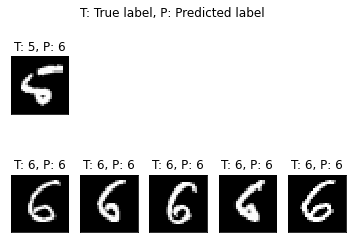

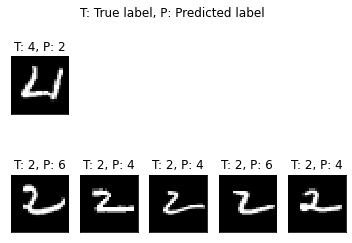

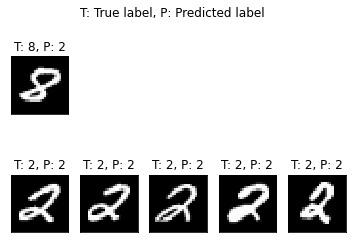

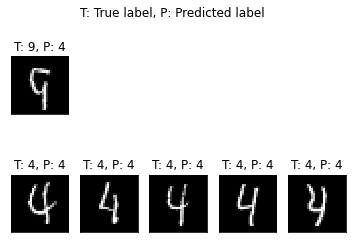

In [ ]:
# We can repeat the same procedure, but pick only training images from the test image's predicted label
# (if test image is a 9 but misclassified as a 4, show closest training images from class 4)
for test_idx in test_indices:
  number_of_examples = 5
  train_indices = (train_labels == test_predictions[test_idx]).nonzero(as_tuple=True)[0]

  filtered_train_images = train_images.index_select(0, train_indices)
  filtered_train_labels = train_labels.index_select(0, train_indices)
  filtered_train_activations = train_activations.index_select(0, train_indices)
  filtered_train_predictions = train_predictions.index_select(0, train_indices)

  distances = torch.norm(filtered_train_activations - test_activations[test_idx:test_idx+1], dim=1, p=None)
  knn = distances.topk(number_of_examples, largest=False).indices
  # print('Smallest distances indices: ', knn.tolist())
  # print('Smallest distances: ', distances.index_select(0, knn).tolist())

  fig = plt.figure()
  fig.suptitle("T: True label, P: Predicted label");
  plt.tight_layout()
  plt.subplot(2,number_of_examples,1)
  plt.imshow(test_images[test_idx][0], cmap='gray', interpolation='none')
  plt.title("T: {}, P: {}".format(test_labels[test_idx], test_predictions[test_idx]))
  plt.xticks([])
  plt.yticks([])
  for i in range(number_of_examples):
    plt.subplot(2,number_of_examples,i+1+number_of_examples)
    plt.imshow(filtered_train_images[knn[i]][0], cmap='gray', interpolation='none')
    plt.title("T: {}, P: {}".format(int(filtered_train_labels[knn[i]].item()), int(filtered_train_predictions[knn[i]].item())))
    plt.xticks([])
    plt.yticks([])